# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

temp_units = "imperial"

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# set lists for the dataframe
city_two = []
cloudiness = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nYour Data Has Been Retrieved\n------------------------------")

Processing Record 1 of Set 1 | bac lieu
Processing Record 2 of Set 1 | norman wells
Processing Record 3 of Set 1 | muravlenko
Processing Record 4 of Set 1 | alappuzha
Processing Record 5 of Set 1 | rocha
Processing Record 6 of Set 1 | lashio
Processing Record 7 of Set 1 | samarai
City not found. Skipping...
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | puqi
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | sitka
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | prince rupert
Processing Record 14 of Set 1 | huancavelica
Processing Record 15 of Set 1 | pisco
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | sistranda
Processing Record 19 of Set 1 | chekmagush
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | mataura
Processing Record 23 of Set 1 | abu samrah
Processing Record 24 of Set 1 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
    # Check to verify arrays are same length
    print(len(city_two), len(cloudiness), len(dates), len(humidities),
    len(lats), len(lngs), len(max_temps), len(wind_speeds))

559 559 559 559 559 559 559 559


In [6]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City": city_two,
    "Cloudiness": cloudiness,
    "Country": countries,
    "Date": dates,
    "Humidity": humidities,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": max_temps,
    "Wind Speed": wind_speeds
}

# Create a DataFrame from the dictionary
weather_df = pd.DataFrame(weather_dict)
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bac lieu,100,RS,1638752216,97,45.3919,19.2367,40.93,6.51
1,norman wells,1,US,1638752216,76,35.2226,-97.4395,70.05,10.36
2,muravlenko,99,RU,1638752216,93,63.7898,74.5230,-18.89,6.22
3,alappuzha,95,IN,1638752217,85,9.4900,76.3264,77.47,5.97
4,rocha,29,UY,1638752217,97,-34.4833,-54.3333,59.77,3.27
...,...,...,...,...,...,...,...,...,...
554,ashibetsu,10,JP,1638752372,79,43.5097,142.1856,32.81,5.32
555,dubbo,90,AU,1638752372,94,-32.2500,148.6167,59.13,12.66
556,byron bay,90,US,1638752373,68,44.0327,-92.6455,36.82,11.99
557,harer,0,ET,1638752373,58,9.3094,42.1258,53.44,4.25


In [7]:
# Note to avoid any issues later, use encoding="utf-8"
weather_df.to_csv("weather_data.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Remove cities where the humidity is >100%
weather_df.describe()

###### There are no cities that have humidity over 100% ########

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,559.000000,5.590000e+02,559.000000,559.000000,559.000000,559.000000,559.000000
mean,59.849732,1.638752e+09,74.858676,22.334010,23.232596,50.670966,7.775760
std,40.752672,9.591999e+01,19.908205,32.387036,84.935326,28.456258,6.058247
min,0.000000,1.638751e+09,13.000000,-54.800000,-175.200000,-42.570000,0.000000
25%,13.000000,1.638752e+09,67.000000,-5.274450,-47.576550,31.380000,3.440000
50%,75.000000,1.638752e+09,80.000000,26.769300,25.516700,59.040000,6.060000
75%,100.000000,1.638752e+09,89.000000,49.116550,96.249250,74.570000,10.560000
max,100.000000,1.638752e+09,100.000000,78.218600,179.316700,96.730000,31.700000


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_weather_df = weather_df.loc[weather_df["Humidity"] < 100, [
    "City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date" ]]
clean_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bac lieu,45.3919,19.2367,40.93,97,100,6.51,RS,1638752216
1,norman wells,35.2226,-97.4395,70.05,76,1,10.36,US,1638752216
2,muravlenko,63.7898,74.5230,-18.89,93,99,6.22,RU,1638752216
3,alappuzha,9.4900,76.3264,77.47,85,95,5.97,IN,1638752217
4,rocha,-34.4833,-54.3333,59.77,97,29,3.27,UY,1638752217


In [10]:
clean_weather_df.info()
# Drop rows missing data
weather_data_no_null = clean_weather_df.dropna()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552 entries, 0 to 558
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        552 non-null    object 
 1   Lat         552 non-null    float64
 2   Lng         552 non-null    float64
 3   Max Temp    552 non-null    float64
 4   Humidity    552 non-null    int64  
 5   Cloudiness  552 non-null    int64  
 6   Wind Speed  552 non-null    float64
 7   Country     552 non-null    object 
 8   Date        552 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 43.1+ KB


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

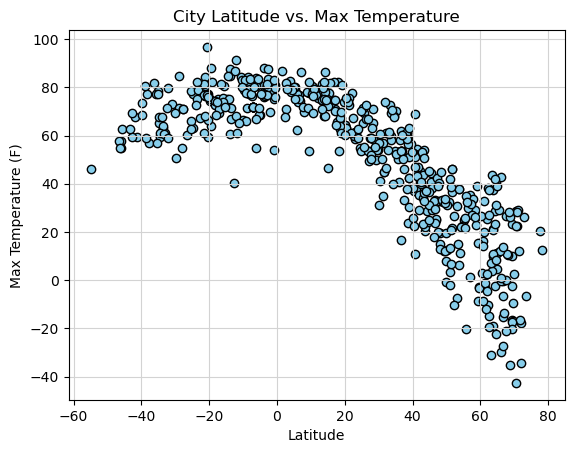

In [11]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

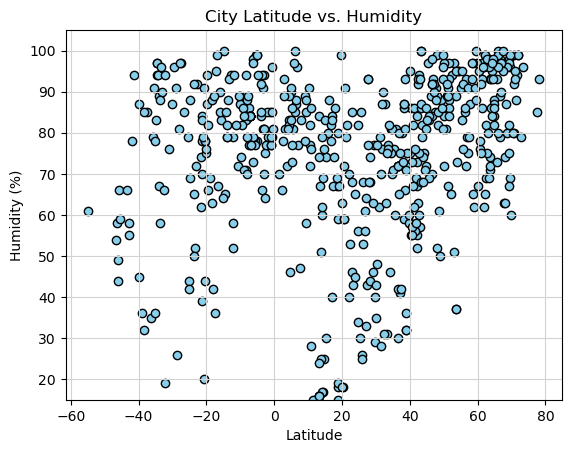

In [12]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

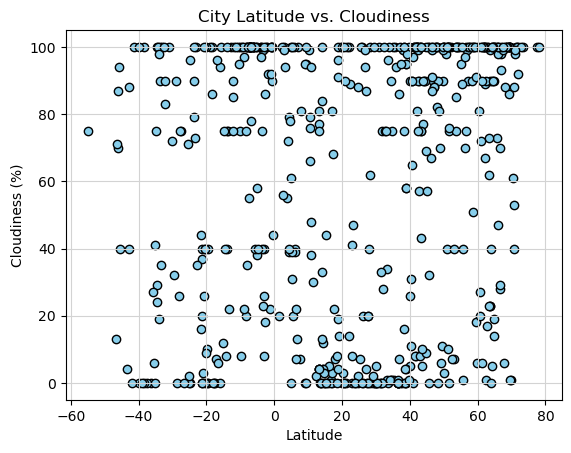

In [13]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

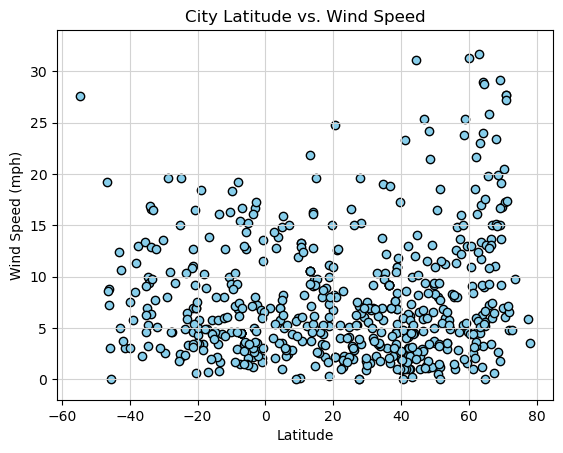

In [14]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/Fig4.png")
plt.show()

## Linear Regression

In [15]:
northern_hem_df = weather_df.loc[weather_df["Lat"] >= 0, [
    "City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date" ]]
northern_hem_df.head()

southern_hem_df = weather_df.loc[weather_df["Lat"] < 0, [
    "City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date" ]]
southern_hem_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,rocha,-34.4833,-54.3333,59.77,97,29,3.27,UY,1638752217
6,samarai,-10.6167,150.6667,84.07,72,100,9.98,PG,1638752218
7,atuona,-9.8000,-139.0333,78.84,74,8,18.32,PF,1638752218
9,busselton,-33.6500,115.3333,63.09,58,90,16.53,AU,1638752218
11,cape town,-36.4130,-71.9028,81.82,35,0,2.30,CL,1638752219


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

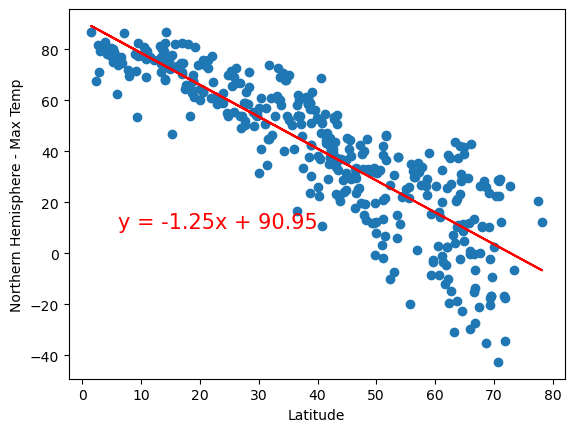

In [16]:
# Add the linear regression equation and line to plot
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Northern Hemisphere - Max Temp')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

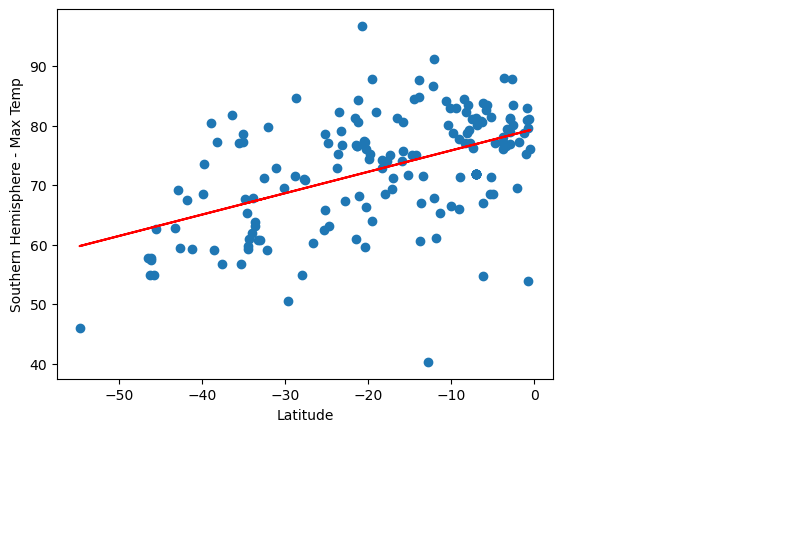

In [17]:
# Add the linear regression equation and line to plot
x_values = southern_hem_df['Lat']
y_values = southern_hem_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Southern Hemisphere - Max Temp')
plt.show()

The linear regression is showing there is a strong correlation between max temp and latitude. The closer you get to the equator (0), the higher the max temp will be.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.16866651896135837


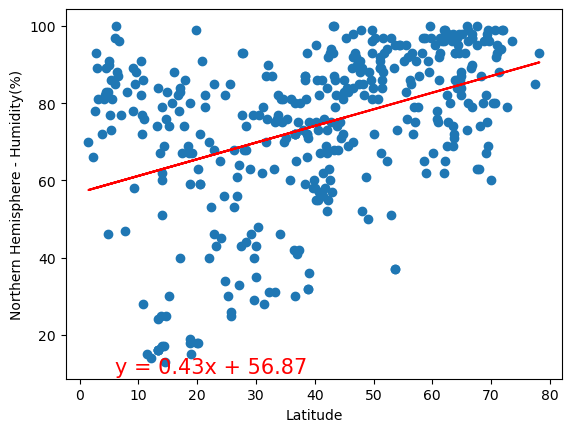

In [18]:
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Northern Hemisphere - Humidity(%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11431283221064274


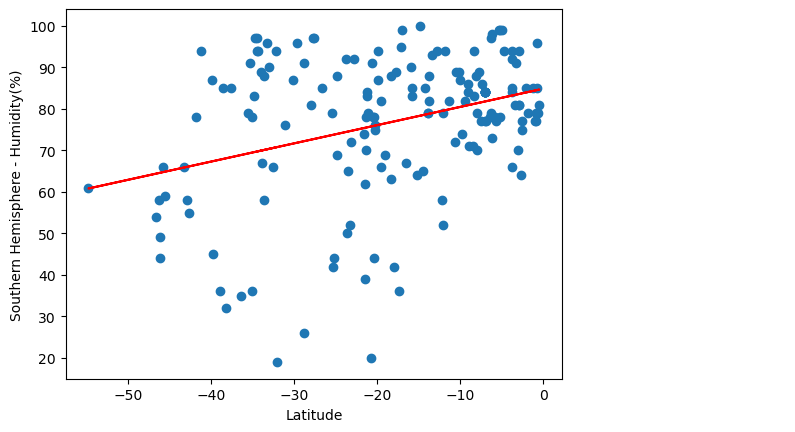

In [19]:
x_values = southern_hem_df['Lat']
y_values = southern_hem_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Southern Hemisphere - Humidity(%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

Here the linear regression is comparing the humidity % compared to the latitude. It appears the further north you go the more humid it becomes!

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11570127252977522


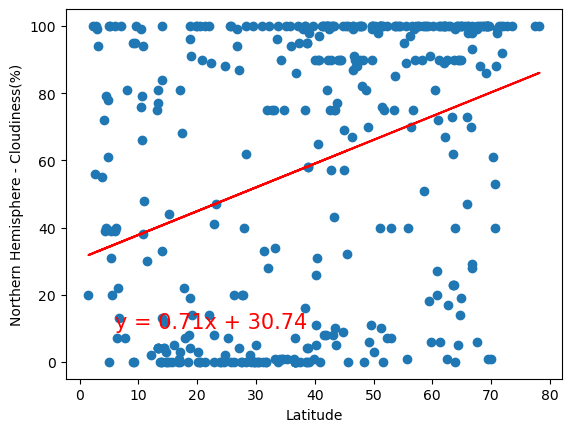

In [20]:
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Northern Hemisphere - Cloudiness(%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07539950299054904


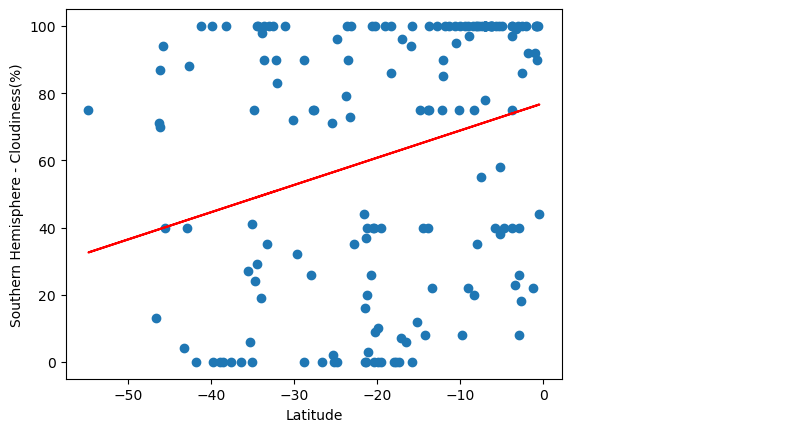

In [21]:
x_values = southern_hem_df['Lat']
y_values = southern_hem_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Southern Hemisphere - Cloudiness(%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

Here the linear regression is comparing the cloudiness % and latitude. It looks like there is a slight positive relationship between cloudiness and latitude. The further north a person goes, the higher the cloudiness % appears to be.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05274781139248499


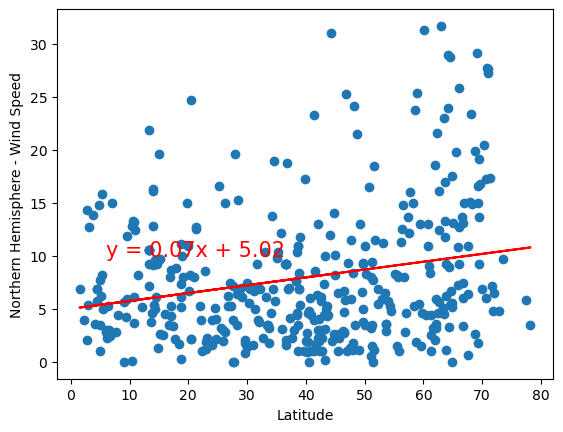

In [22]:
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Northern Hemisphere - Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.033257533008838006


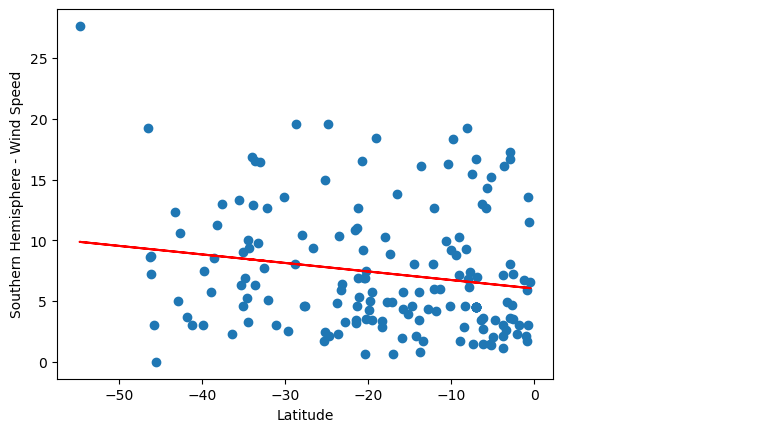

In [23]:
x_values = southern_hem_df['Lat']
y_values = southern_hem_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Southern Hemisphere - Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The linear regression is looking for a relationship between wind speed and latitude. It does not appear there is any relationship between wind speed and latitude.